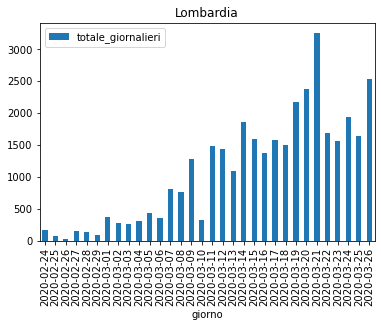

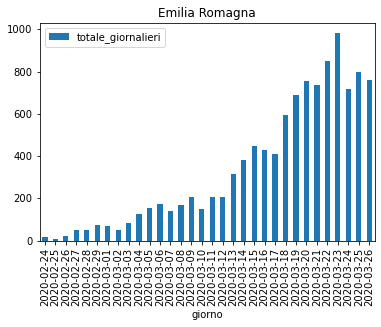

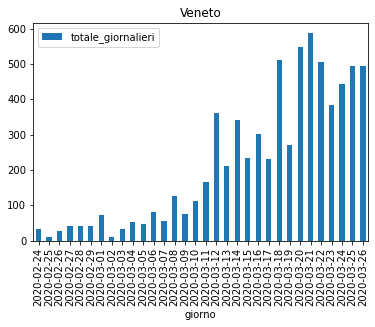

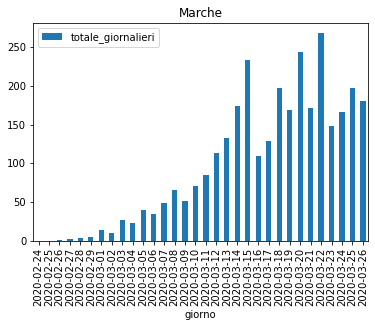

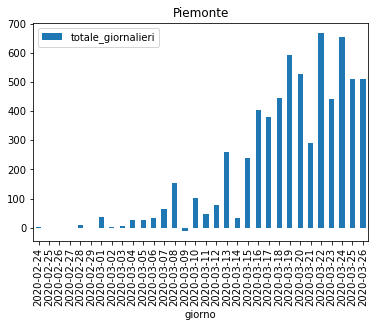

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv")

df.insert(0, "giorno","1970-01-01", allow_duplicates=False)
df.insert(len(df.columns)-2, "totale_giornalieri", 0, allow_duplicates=False)
date_format = "%Y-%m-%dT%H:%M:%S"

def set_giorno(row):
    row["giorno"] = datetime.strptime(row['data'],date_format).date()
    return row

def add_delta(row):
     
    current_date= row['giorno']
    previous_date = (current_date - timedelta(1))
    region =  row['denominazione_regione']
    previous_record = df[(df['denominazione_regione'] == region) & (df['giorno'] == previous_date)]   
    
    if previous_record.shape[0] == 1:
        row["totale_giornalieri"] = row["totale_casi"] - previous_record["totale_casi"].values[0]
    else: row["totale_giornalieri"] = row["totale_casi"]

    return row

df = df.apply(set_giorno,axis=1)

df =df.apply(add_delta,axis=1)

lombardia =  df[df['denominazione_regione']== "Lombardia"]
emilia =  df[df['denominazione_regione']== "Emilia Romagna"]
veneto =  df[df['denominazione_regione']== "Veneto"]
marche =  df[df['denominazione_regione']== "Marche"]
piemonte =  df[df['denominazione_regione']== "Piemonte"]


lombardia.plot.bar(title= "Lombardia",x="giorno",y ='totale_giornalieri')
emilia.plot.bar(title= "Emilia Romagna",x="giorno",y ='totale_giornalieri')
veneto.plot.bar(title= "Veneto",x="giorno",y ='totale_giornalieri')
marche.plot.bar(title= "Marche",x="giorno",y ='totale_giornalieri')
piemonte.plot.bar(title= "Piemonte",x="giorno",y ='totale_giornalieri')
